In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('Billionaire.csv')
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [11]:
data['NetWorth']=data['NetWorth'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else str(x))
data['NetWorth']=data['NetWorth'].apply(lambda x:str(x).replace('B','') if 'B' in str(x) else str(x))
data['NetWorth']=data['NetWorth'].apply(lambda x:float(x))

In [12]:
data['NetWorth']

0       177.0
1       151.0
2       150.0
3       124.0
4        97.0
        ...  
2750      1.0
2751      1.0
2752      1.0
2753      1.0
2754      1.0
Name: NetWorth, Length: 2755, dtype: float64

In [3]:
data.shape

(2755, 7)

In [13]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [14]:
data[data['Age'].isnull()]

,Name,NetWorth,Country,Source,Rank,Age,Industry
132,Hinduja brothers,14.9,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,9.1,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,8.8,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,8.7,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,8.4,India,paints,294,NaN,Manufacturing
...,...,...,...,...,...,...,...
2580,Lai Baosheng,1.1,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,1.1,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,1.0,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,1.0,Canada,packaged meats,2674,NaN,Food & Beverage


<AxesSubplot:>

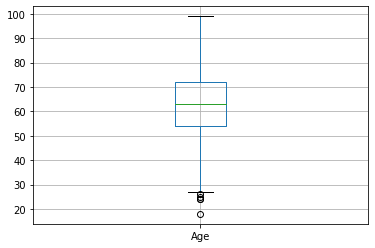

In [47]:
data.boxplot(column='Age')

In [16]:
data.describe()

,NetWorth,Rank,Age
count,2755.000000,2755.000000,2676.000000
mean,4.749220,1345.663521,63.113602
std,9.615358,772.669811,13.445153
min,1.000000,1.000000,18.000000
25%,1.500000,680.000000,54.000000
50%,2.300000,1362.000000,63.000000
75%,4.200000,2035.000000,73.000000
max,177.000000,2674.000000,99.000000


In [17]:
def inputmedian(x):
    return x.fillna(x.median())
data['Age']=data['Age'].transform(inputmedian)

In [18]:
data['Age'].isnull().sum()

0

In [19]:
# top  10 countries 
data['Country'].value_counts().head(10)

United States     724
China             626
India             140
Germany           136
Russia            118
Hong Kong          71
Brazil             65
Canada             64
United Kingdom     56
Italy              51
Name: Country, dtype: int64

In [67]:
country_grp1=data.groupby(by='Country').agg({'Country':'count','NetWorth':'sum'})
country_grp1.rename({'Country':'CountofName','NetWorth':'SumofNetworth'},axis=1,inplace=True)
#country_grp['%Count_of_Name'] = round((country_grp['CountofName']/sum(country_grp['CountofName']))*100, 2)
country_grp1.sort_values(by='SumofNetworth', ascending = False,inplace=True)
country_grp1[:20]


,CountofName,SumofNetworth
Country,,
United States,724,4398.4
China,626,2531.9
Germany,136,625.5
India,140,596.4
Russia,118,586.0
France,42,512.2
Hong Kong,71,448.2
Canada,64,231.1
Japan,49,225.4


In [22]:
#top sources
data['Source'].value_counts()

real estate         171
pharmaceuticals      99
investments          90
diversified          85
software             62
                   ... 
medical products      1
medical labs          1
payment software      1
video streaming       1
Urban Outfitters      1
Name: Source, Length: 924, dtype: int64

In [23]:
source_grp = data.groupby('Source').agg({'Source' : 'count', 'NetWorth':'sum'})
source_grp.sort_values(by='NetWorth',ascending=False).head(10)

,Source,NetWorth
Source,,
real estate,171,686.1
diversified,85,378.2
investments,90,339.2
pharmaceuticals,99,335.3
software,62,275.8
hedge funds,42,240.1
Amazon,2,230.0
e-commerce,24,225.5
Walmart,7,220.2


In [26]:
data['Age'].min()

18.0

In [30]:
data['Age_Group'] = np.where((data['Age'] >= 18) & (data['Age'] <= 28), '18 - 28 years',
                            np.where((data['Age'] > 28) & (data['Age'] <= 38), '28 - 38 years',
                                    np.where((data['Age'] > 38) & (data['Age'] <= 48), '38 - 48 years',
                                            np.where((data['Age'] > 48) & (data['Age'] <= 58), '48 - 58 years',
                                                    np.where((data['Age'] > 58) & (data['Age'] <= 68), '58 - 68 years',
                                                            np.where((data['Age'] > 68), '68+ years', 'NA'))))))

In [31]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,Age_Group
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology,48 - 58 years
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive,48 - 58 years
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail,68+ years
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology,58 - 68 years
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology,28 - 38 years


In [32]:
data['Age_Group'].value_counts()

68+ years        944
58 - 68 years    738
48 - 58 years    716
38 - 48 years    273
28 - 38 years     76
18 - 28 years      8
Name: Age_Group, dtype: int64

In [34]:
Age = data.groupby('Age_Group').agg({'Age_Group' : 'count', 'NetWorth':'sum'})
Age.sort_values('NetWorth', ascending = False, inplace = True)
Age

,Age_Group,NetWorth
Age_Group,,
68+ years,944,4937.7
48 - 58 years,716,3405.2
58 - 68 years,738,3160.9
38 - 48 years,273,1150.0
28 - 38 years,76,411.9
18 - 28 years,8,18.4


In [43]:
x = data.groupby(by='Age_Group').agg({'Age_Group':'count','NetWorth':'sum'})
x.rename({'Age_Group':'AgeCount','NetWorth':'SumofNetWorth'},axis=1,inplace=True)
x['%CountOfNetWorth']=round(x['AgeCount']/sum(x['AgeCount'])*100,2)
x.sort_values('SumofNetWorth', ascending = False, inplace = True)
x

,AgeCount,SumofNetWorth,%CountOfNetWorth
Age_Group,,,
68+ years,944,4937.7,34.26
48 - 58 years,716,3405.2,25.99
58 - 68 years,738,3160.9,26.79
38 - 48 years,273,1150.0,9.91
28 - 38 years,76,411.9,2.76
18 - 28 years,8,18.4,0.29


In [ ]:
#data visualization

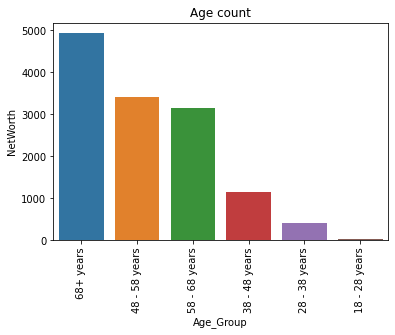

In [71]:
#age vs Networth
sns.barplot(x=x.index,y='SumofNetWorth',data=x)
plt.title('Age count')
plt.xticks(rotation=90)
plt.ylabel('NetWorth')
plt.show()

In [58]:
# correlation between variables
ap=data.corr()

<AxesSubplot:>

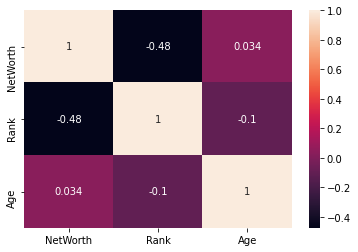

In [60]:
sns.heatmap(ap,annot=True)

In [61]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,Age_Group
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology,48 - 58 years
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive,48 - 58 years
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail,68+ years
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology,58 - 68 years
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology,28 - 38 years


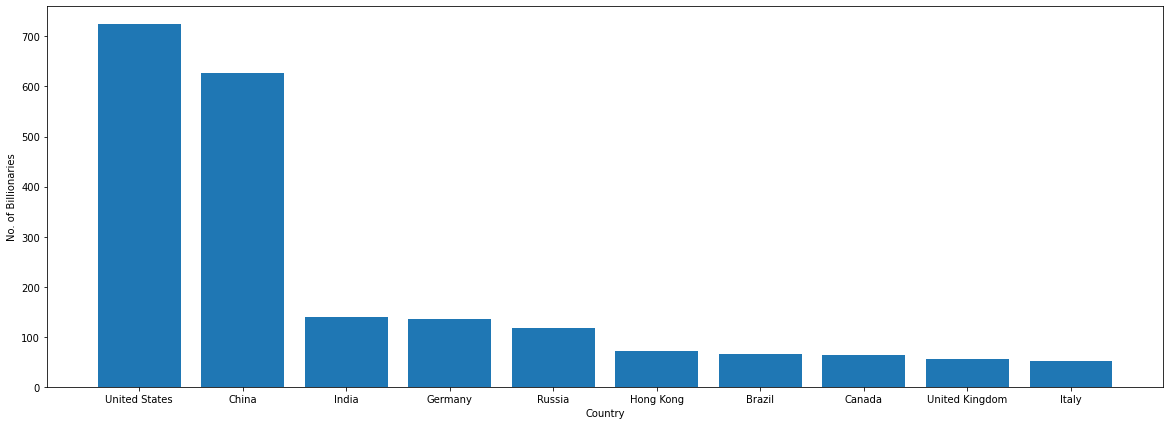

In [68]:
#top 10 countries
plt.figure(figsize = (20, 7))
plt.bar(list(data['Country'].value_counts()[:10].keys()), (list(data['Country'].value_counts()[:10])))
plt.xlabel('Country')
plt.ylabel('No. of Billionaries')
plt.show()


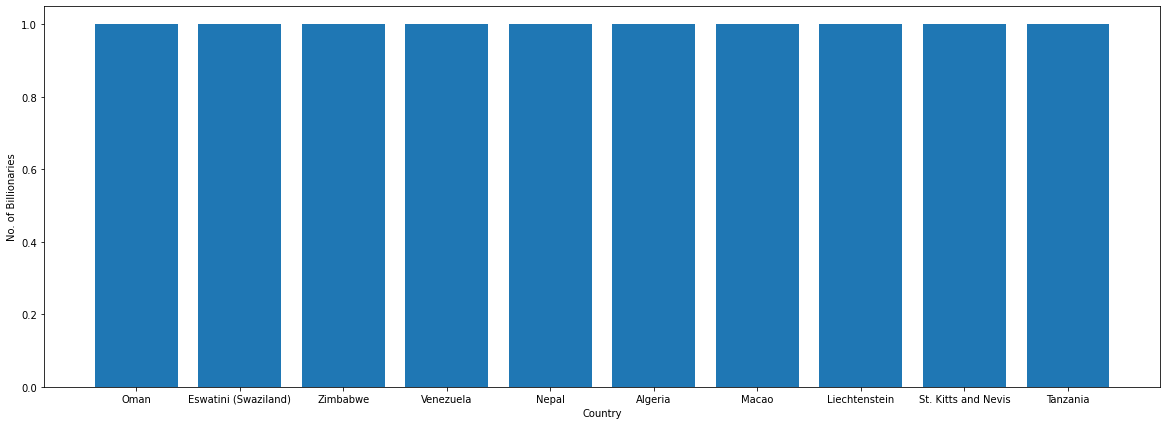

In [73]:
#below 10 countries 
plt.figure(figsize = (20, 7))
plt.bar(list(data['Country'].value_counts()[-10:].keys()), (list(data['Country'].value_counts()[-10:])))
plt.xlabel('Country')
plt.ylabel('No. of Billionaries')
plt.show()

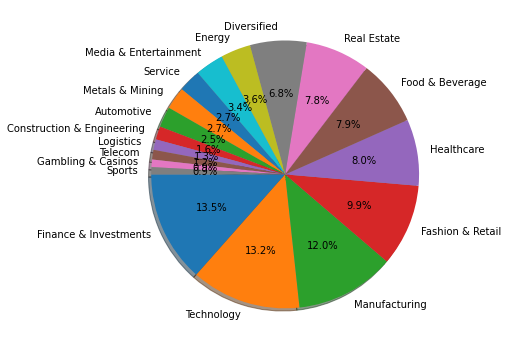

In [83]:
#distribution of billionaries by industry
plt.figure(figsize = (6, 7))
plt.pie(data['Industry'].value_counts(), labels = data['Industry'].value_counts().keys(), autopct = '%0.1f%%', startangle = 180, shadow = True)
plt.show()